<a href="https://colab.research.google.com/github/KimJose2001/PIFINAL/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Processamento de Identificação de Placas de Carros** 

## **Instituto de Ciência e Tecnologia - Universidade Federal de São Paulo** 

Kim José Koto Murakawa - 133721

Matheus Santos Volotão - 104782


#### Conectar com o Google Drive

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract 
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/master/por.traineddata?raw=true

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,968 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [2]:
import pytesseract

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Importar as Bibliotecas


In [4]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

#### Função para imprimir a imagem colorida


In [5]:
def imprimir(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 8)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

#### Imagem 01 - Utilizada para testes

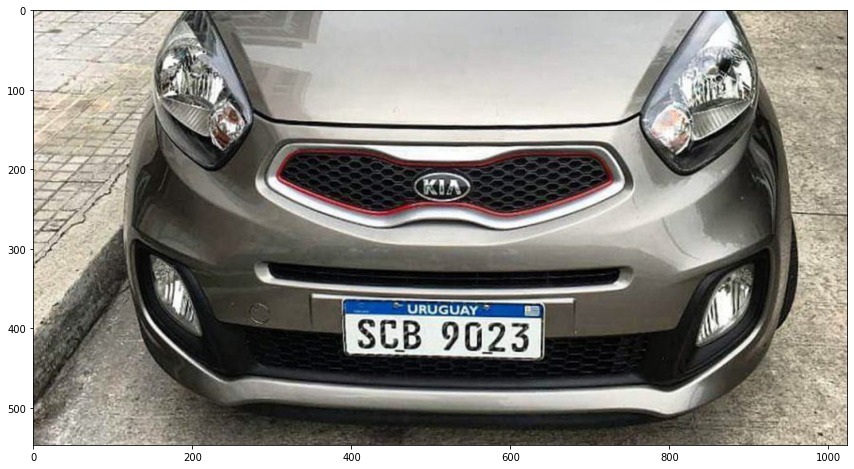

In [16]:
img = cv2.imread('/content/gdrive/MyDrive/Imagens/DatasetAtualizado/Placa_19.jpg')
imprimir(img)

#### Convertemos a imagem para Escala Cinza


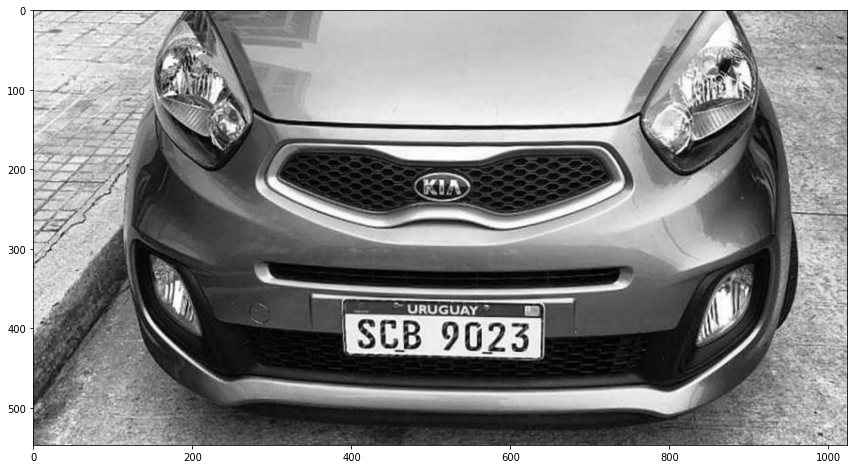

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imprimir(gray)

#### Aplicação de Desfoque Bilateral


Aplicamos o efeito Desfoque Bilateral desfoca seletivamente uma imagem de forma que as bordas e outros detalhes sejam preservados. Assim as áres com alto contraste, onde os valores de pixel são diferentes em uma grande quantidade, ficam menos desfocadas que áreas de menor constraste

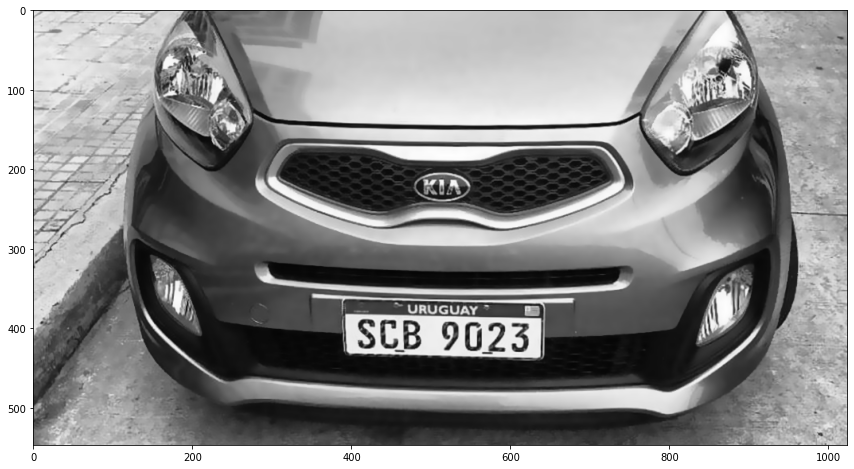

In [18]:
blur = cv2.bilateralFilter(gray, 11, 17, 17)
imprimir(blur)

#### Detecção de bordas (Canny Edge)

Aplicamos um algoritmo de Detecção de Bordas, chamado de **Canny Edge Detector** desenvolvido por John F. Canny em 1986 e tem sido usado extensivamente desde então.

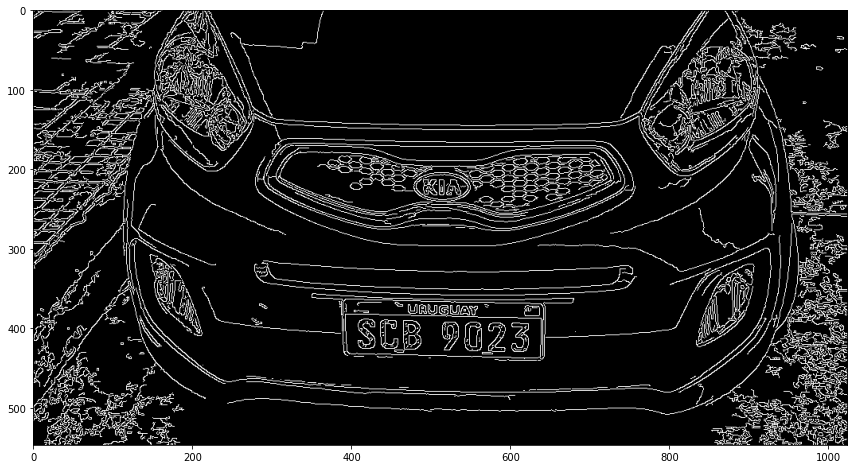

In [19]:
edged = cv2.Canny(blur, 30, 200) 
imprimir(edged)

#### Detecção de Contornos

O nosso objetivo inicialmente é detectar o contorno da placa, então utilizamos a função **findContours** para identificar todos os contornos da imagem.

In [20]:
conts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(conts) 
conts = sorted(conts, key=cv2.contourArea, reverse=True)[:8] 

In [21]:
conts

[array([[[392, 382]],
 
        [[392, 403]],
 
        [[393, 404]],
 
        [[393, 419]],
 
        [[394, 420]],
 
        [[394, 429]],
 
        [[397, 432]],
 
        [[398, 431]],
 
        [[399, 432]],
 
        [[405, 432]],
 
        [[406, 431]],
 
        [[407, 431]],
 
        [[408, 432]],
 
        [[429, 432]],
 
        [[430, 433]],
 
        [[431, 433]],
 
        [[432, 432]],
 
        [[449, 432]],
 
        [[450, 433]],
 
        [[483, 433]],
 
        [[484, 434]],
 
        [[519, 434]],
 
        [[520, 435]],
 
        [[550, 435]],
 
        [[551, 436]],
 
        [[552, 435]],
 
        [[563, 435]],
 
        [[564, 436]],
 
        [[600, 436]],
 
        [[601, 437]],
 
        [[616, 437]],
 
        [[617, 438]],
 
        [[618, 437]],
 
        [[634, 437]],
 
        [[635, 436]],
 
        [[637, 436]],
 
        [[637, 421]],
 
        [[638, 420]],
 
        [[638, 387]],
 
        [[609, 387]],
 
        [[608, 386]],
 
        [[559, 3

#### Encontrando a placa

arcLength() - Também é chamado de comprimento de arco.

approxPolyDP() -  aproxima uma curva ou um polígono com outra curva/polígono com menos vértices para que a distância entre eles seja menor ou igual à precisão especificada, utiliza o algoritmo Douglas-Peucker



In [22]:
localizacao = None
for c in conts:
    peri = cv2.arcLength(c, True)
    aprox = cv2.approxPolyDP(c, 0.05 * peri, True)
    if cv2.isContourConvex(aprox):
      if len(aprox) == 4:
          localizacao = aprox
          break

In [23]:
print(localizacao)

[[[392 382]]

 [[397 432]]

 [[637 436]]

 [[638 387]]]


In [24]:
mascara = np.zeros(gray.shape, np.uint8) 

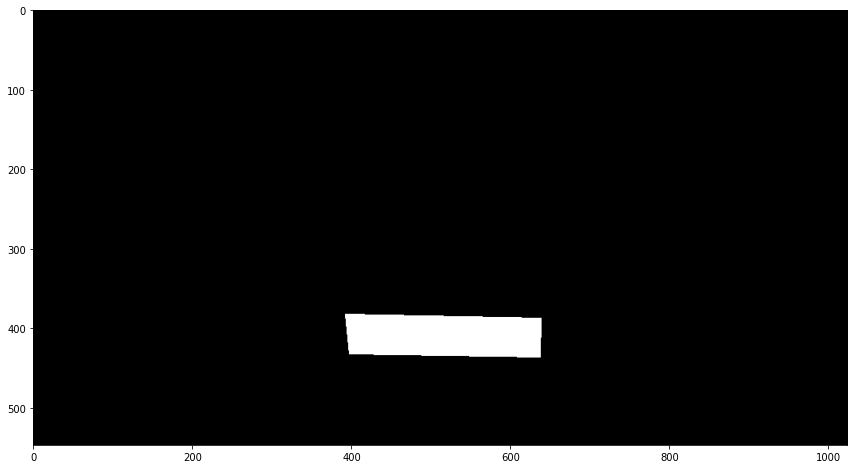

In [25]:
mascara = np.zeros(gray.shape, np.uint8) 
img_placa = cv2.drawContours(mascara, [localizacao], 0, 255, -1)
imprimir(mascara)

Adiciona a operação "AND", que mescla as duas imagens, usando a mascara preta

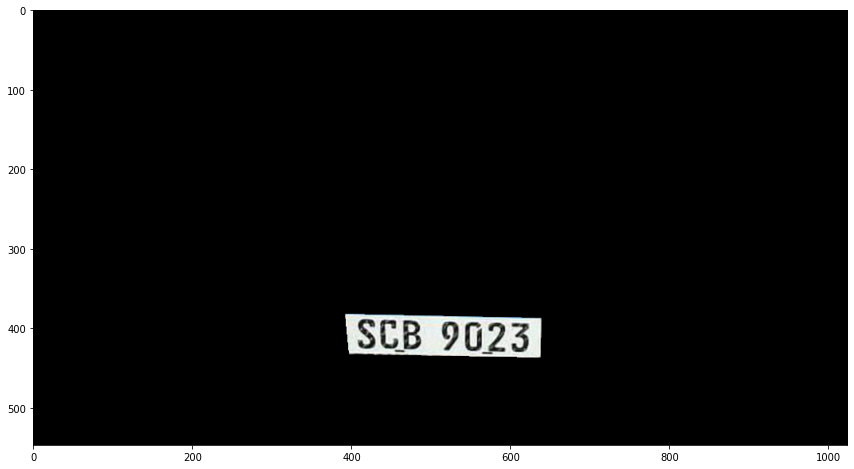

In [26]:
img_placa = cv2.bitwise_and(img, img, mask=mascara)
imprimir(img_placa)

Localiza a parte branca da mascara e salva a localização da placa na imagem original

In [27]:
(y, x) = np.where(mascara==255)
(inicioX, inicioY) = (np.min(x), np.min(y))
(fimX, fimY) = (np.max(x), np.max(y))
inicioX, inicioY, fimX, fimY

(392, 382, 638, 436)

In [28]:
placa = gray[inicioY:fimY, inicioX:fimX]

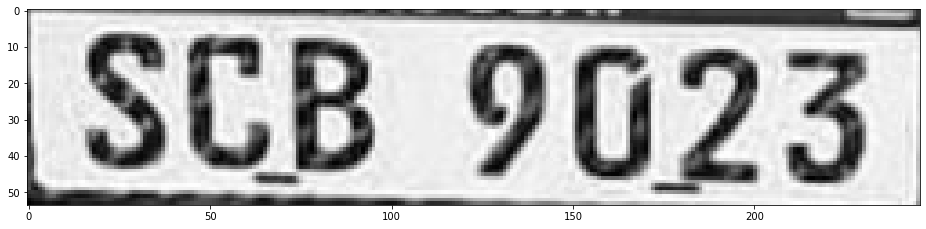

In [29]:
imprimir(placa)

In [30]:
config_tesseract = "--tessdata-dir tessdata --psm 6"

In [31]:
texto = pytesseract.image_to_string(placa, lang="por", config=config_tesseract)
print(texto)

SCB 9023



In [32]:
texto = "".join(caractere for caractere in texto if caractere.isalnum())
texto

'SCB9023'

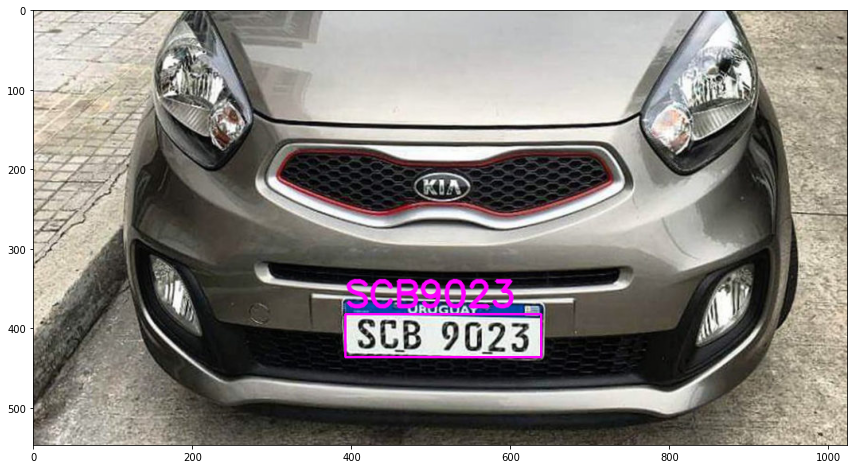

In [33]:
img_final = cv2.putText(img, texto, (inicioX, inicioY - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 255), 4, lineType=cv2.LINE_AA)
img_final = cv2.rectangle(img, (inicioX, inicioY), (fimX, fimY), (255, 0, 255), 2)
imprimir(img_final)